In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    Flatten,
    Dense,
    Dropout,
)
import pickle 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import shap

Consruct emotion model, download and load weights (Emotion.py in Deepface)

In [2]:
input_dim_ = 64

In [3]:
num_classes = 2

model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, (5, 5), activation="relu", input_shape=(input_dim_, input_dim_, 1)))
# model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))

# 2nd convolution layer
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3rd convolution layer
model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Flatten())

# fully connected neural networks
# model.add(Dense(1024, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(1024, activation="relu"))
# model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M2


2024-08-24 21:56:27.150260: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-24 21:56:27.150392: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 128)      0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 2)                 3

### load model trained on asian

In [5]:
model.load_weights('../models/DAiSEE_confusion_weights_final.h5')

### test on asian

In [6]:
# load pickle file
files = [
         '../data_features_labels/EA_annotated_3Blue1Brown_final.pkl']
# files = ['Eastern_Asian_Dataset.pkl']
x_all_list_ea = []
y_all_list_ea = [] 
race_list = []
for file in files:
    
    with open(file, 'rb') as f:
        features, labels = pickle.load(f)
    
    for pic, label in zip(features, labels):
        # plt.imshow(img_gray, cmap='binary_r')
        x_all_list_ea.append(pic)
        y_all_list_ea.append(label)
        
        # if file in ['../data_features_labels/EA_annotated_3Blue1Brown_final.pkl']:
        #     race_list.append('EA')
        # else:
        #     race_list.append('Polish')

In [7]:
X_all_ea = np.array(x_all_list_ea).reshape(-1, 64, 64, 1)
#one-hot encode target column
Y_all_ea = to_categorical(np.array(y_all_list_ea))

In [8]:
label_names = ['Not Confused', 'Confused']

In [9]:
x_train_ea, x_test_ea, y_train_ea, y_test_ea = train_test_split(X_all_ea, Y_all_ea, test_size=0.2, random_state=42)
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [10]:
prediction_proba_ea = model.predict(x_test_ea)
y_predict_ea = prediction_proba_ea.argmax(axis=1)
y_true_ea = y_test_ea.argmax(axis=1)

2024-08-24 21:57:10.078222: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-08-24 21:57:10.135409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [11]:
accuracy_ea = accuracy_score(y_true_ea, y_predict_ea)
accuracy_ea

0.46866952789699573

### polish

In [12]:
# load pickle file
files = [
         '../data_features_labels/Polish_Dataset.pkl']
# files = ['Eastern_Asian_Dataset.pkl']
x_all_list_po = []
y_all_list_po = [] 
race_list = []
for file in files:
    
    with open(file, 'rb') as f:
        features, labels = pickle.load(f)
    
    for pic, label in zip(features, labels):
        # plt.imshow(img_gray, cmap='binary_r')
        x_all_list_po.append(pic)
        y_all_list_po.append(label)
        
        # if file in ['../data_features_labels/EA_annotated_3Blue1Brown_final.pkl']:
        #     race_list.append('EA')
        # else:
        #     race_list.append('Polish')

In [13]:
X_all_po = np.array(x_all_list_po).reshape(-1, 64, 64, 1)
#one-hot encode target column
Y_all_po = to_categorical(np.array(y_all_list_po))

In [14]:
label_names = ['Not Confused', 'Confused']

In [15]:
x_train_po, x_test_po, y_train_po, y_test_po = train_test_split(X_all_po, Y_all_po, test_size=0.2, random_state=42)


In [16]:
prediction_proba_po = model.predict(x_test_po)
y_predict_po = prediction_proba_po.argmax(axis=1)
y_true_po = y_test_po.argmax(axis=1)

In [17]:
accuracy_po = accuracy_score(y_true_po, y_predict_po)
accuracy_po

0.47533401849948614

/var/folders/5m/4tj5fx915fv1z073c22c2q7m0000gn/T/ipykernel_4132/1360466826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot([accuracy_ea, accuracy_po], ax=ax, palette= ['#C25759', '#599CB4'])


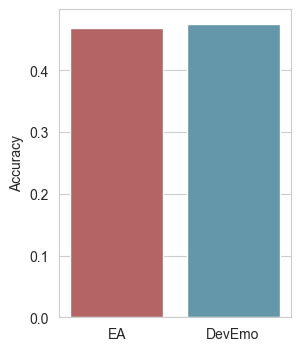

### Indian

In [19]:
# load pickle file
files = ['../data_features_labels/Train_crop.pkl', '../data_features_labels/Test_crop.pkl', '../data_features_labels/Validation_crop.pkl']
# files = ['Eastern_Asian_Dataset.pkl']
x_all_list_indian = []
y_all_list_indian = [] 
race_list = []
for file in files:
    
    with open(file, 'rb') as f:
        features, labels = pickle.load(f)
    
    for pic, label in zip(features, labels):
        # plt.imshow(img_gray, cmap='binary_r')
        x_all_list_indian.append(pic)
        y_all_list_indian.append(label)
        
        # if file in ['../data_features_labels/EA_annotated_3Blue1Brown_final.pkl']:
        #     race_list.append('EA')
        # else:
        #     race_list.append('Polish')

In [20]:
X_all_indian = np.array(x_all_list_indian).reshape(-1, 64, 64, 1)
#one-hot encode target column
Y_all_indian = to_categorical(np.array(y_all_list_indian))

In [21]:
label_names = ['Not Confused', 'Confused']

In [22]:
x_train_indian, x_test_indian, y_train_indian, y_test_indian = train_test_split(X_all_indian, Y_all_indian, test_size=0.2, random_state=42)


In [23]:
prediction_proba_indian = model.predict(x_test_indian)
y_predict_indian = prediction_proba_indian.argmax(axis=1)
y_true_indian = y_test_indian.argmax(axis=1)

In [24]:
accuracy_indian = accuracy_score(y_true_indian, y_predict_indian)
accuracy_indian

0.7401082882132445

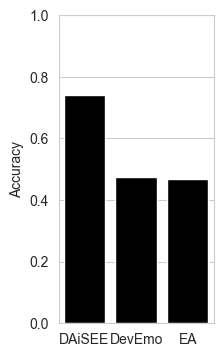

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(2, 4))
sns.barplot([accuracy_indian, accuracy_po, accuracy_ea], ax=ax, color='k')
ax.set_ylabel('Accuracy')
ax.set_xticks([0, 1, 2])
ax.set_ylim([0, 1])
ax.set_xticklabels(['DAiSEE', 'DevEmo', 'EA'])
fig.savefig('../figure_panels/DAiSEE_on_all.svg', bbox_inches='tight', dpi=300)